# UD1 Randomized Algorithms and Concentration Inequalities  
**Course:** Quantum Machine Learning and Quantumn computers 

**Name:** Ferrán Mata Infante

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, beta

In [ ]:
# Number of data
N = 5722800

# Gaussian distribution
mu_gaussian = 1 #Mean value
sigma_gaussian = 0.5 #Sigma

# Uniform distribution
a_uniform=0
b_uniform=1

# Beta distribution
alpha_beta, beta_beta= 2, 5

In first place, we're going to plot the function distributions



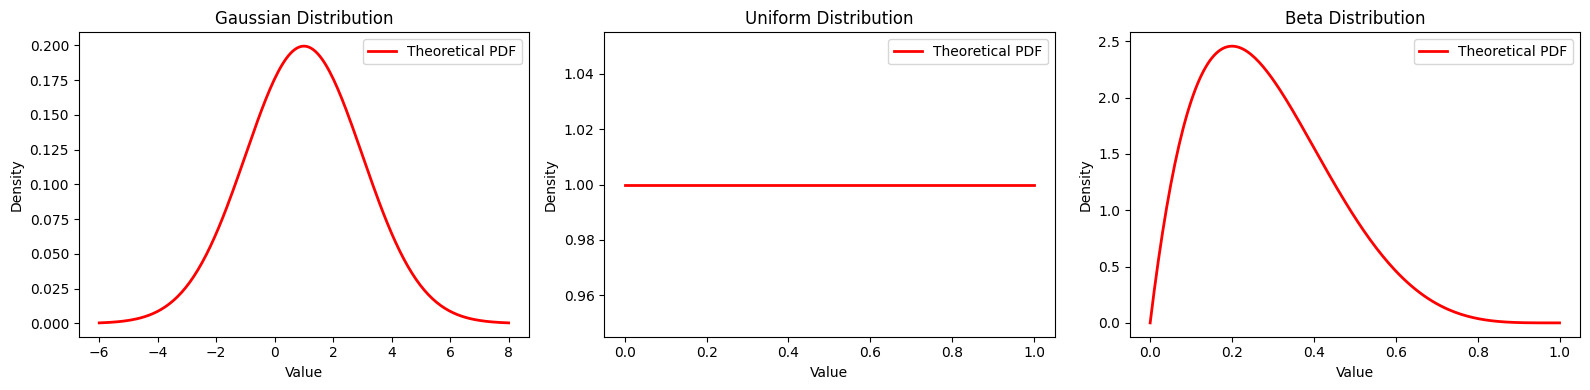

In [86]:
x_gaussian = np.linspace(-6,8, 200)
x_uniform = np.linspace(a_uniform, b_uniform, 200)
x_beta = np.linspace(0, 1, 200)

plt.figure(figsize=(16, 4))

# --- Gaussian ---
plt.subplot(1, 3, 1)
plt.plot(x_gaussian, norm.pdf(x_gaussian, mu_gaussian, sigma_gaussian), color='red', lw=2, label='Theoretical PDF')
plt.title("Gaussian Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

# --- Uniform ---
plt.subplot(1, 3, 2)
plt.plot(x_uniform, uniform.pdf(x_uniform, a_uniform, b_uniform-a_uniform), color='red', lw=2, label='Theoretical PDF')
plt.title("Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

# --- Beta ---
plt.subplot(1, 3, 3)
plt.plot(x_beta, beta.pdf(x_beta, alpha_beta, beta_beta), color='red', lw=2, label='Theoretical PDF')
plt.title("Beta Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()


Let's generate some random data according to this Distributions

In [67]:

data_gaussian =np.random.normal(mu_gaussian, sigma_gaussian, N)

data_uniform = np.random.uniform(low=a_uniform, high=b_uniform, size=N)

data_beta = np.random.beta(alpha_beta, beta_beta, N)


# Theoretical Values of Mean and Variance

We are going to compare the theoretical values with the empirical values of the distributions. In the following table, you can see the theoretical values.

| Distribution | Parameters | Mean ($\mu$) | Variance ($\sigma^2$) |
|-------------|------------|----------------|----------------------|
| Gaussian (Normal) | $\mu, \sigma$ | $\mu$ | $\sigma^2$ |
| Uniform | $a, b$ | $\frac{a+b}{2}$ | $\frac{(b-a)^2}{12}$ |
| Beta | $\alpha, \beta$ | $\frac{\alpha}{\alpha+\beta}$ | $\frac{\alpha \beta}{(\alpha+\beta)^2 (\alpha+\beta+1)}$ |


In [89]:
# Empirical means and variances
mean_gaussian_emp = np.mean(data_gaussian)
var_gaussian_emp = np.var(data_gaussian) 

mean_uniform_emp  = np.mean(data_uniform)
var_uniform_emp  = np.var(data_uniform)

mean_beta_emp     = np.mean(data_beta)
var_beta_emp     = np.var(data_beta)

# Teorical means and variances
mean_gaussian_teo=mu_gaussian
var_gaussian_teo=sigma_gaussian**2

mean_uniform_teo=(a_uniform+b_uniform)/2.0
var_uniform_teo=(b_uniform-a_uniform)**2/12.0

mean_beta_teo=alpha_beta/(alpha_beta+beta_beta)
var_beta_teo=alpha_beta*beta_beta/((alpha_beta+beta_beta+1.0)*(alpha_beta+beta_beta)**2)

# Relative error calculation
rel_error_mean_gaussian = abs(mean_gaussian_emp - mean_gaussian_teo) / mean_gaussian_teo * 100
rel_error_var_gaussian  = abs(var_gaussian_emp - var_gaussian_teo) / var_gaussian_teo * 100

rel_error_mean_uniform = abs(mean_uniform_emp - mean_uniform_teo) / mean_uniform_teo * 100
rel_error_var_uniform  = abs(var_uniform_emp - var_uniform_teo) / var_uniform_teo * 100

rel_error_mean_beta = abs(mean_beta_emp - mean_beta_teo) / mean_beta_teo * 100
rel_error_var_beta  = abs(var_beta_emp - var_beta_teo) / var_beta_teo * 100


# Create a formatted table
print(f"{'Distribution':<10} | {'Empirical Mean':>15} | {'Theoretical Mean':>17} | {'Rel. Error (%)':>15} | {'Empirical Var':>15} | {'Theoretical Var':>17} | {'Rel. Error (%)':>15}")
print("-"*120)

print(f"{'Gaussian'} | {mean_gaussian_emp:15.4f} | {mean_gaussian_teo:17.4f} | {rel_error_mean_gaussian:15.4f} | {var_gaussian_emp:15.4f} | {var_gaussian_teo:17.4f} | {rel_error_var_gaussian:15.4f}")
print(f"{'Uniform'}  | {mean_uniform_emp:15.4f} | {mean_uniform_teo:17.4f} | {rel_error_mean_uniform:15.4f} | {var_uniform_emp:15.4f} | {var_uniform_teo:17.4f} | {rel_error_var_uniform:15.4f}")
print(f"{'Beta'}     | {mean_beta_emp:15.4f} | {mean_beta_teo:17.4f} | {rel_error_mean_beta:15.4f} | {var_beta_emp:15.4f} | {var_beta_teo:17.4f} | {rel_error_var_beta:15.4f}")



Distribution |  Empirical Mean |  Theoretical Mean |  Rel. Error (%) |   Empirical Var |   Theoretical Var |  Rel. Error (%)
------------------------------------------------------------------------------------------------------------------------
Gaussian |          0.9990 |            1.0000 |          0.1004 |          4.0036 |            4.0000 |          0.0908
Uniform  |          0.5001 |            0.5000 |          0.0160 |          0.0833 |            0.0833 |          0.0112
Beta     |          0.2857 |            0.2857 |          0.0100 |          0.0255 |            0.0255 |          0.0726


# Error Bars and Concentration Inequalities 

## 1. Hoeffding Inequality

For a set of independent random variables $X_1, X_2, ..., X_N$ bounded in $[a, b]$, the probability that the empirical mean $\bar{X}$ deviates from the expected value $\mathbb{E}[\bar{X}]$ by more than $\epsilon$ is bounded by:

$$
P(|\bar{X} - \mathbb{E}[\bar{X}]| \ge \epsilon) \le 2 \exp\Bigg(-\frac{2 N \epsilon^2}{(b-a)^2}\Bigg)
$$

The error bar (maximum deviation $\epsilon$) with confidence $1-\delta$ is:

$$
\epsilon_{\text{Hoeffding}} \le \sqrt{\frac{(b-a)^2 \ln(2/\delta)}{2 N}}
$$

---

## 2. Chebyshev Inequality

For a random variable with mean $\mu$ and variance $\sigma^2$, the probability that the sample mean $\bar{X}$ deviates from the true mean by more than $\epsilon$ is bounded by:

$$
P(|\bar{X} - \mu| \ge \epsilon) \le \frac{\sigma^2}{N \epsilon^2}
$$

The error bar (maximum deviation $\epsilon$) with confidence $1-\delta$ is:
$$
\epsilon_{\text{Chebyshev}} \le \sqrt{\frac{\sigma^2}{N \delta}}
$$


In that way, we can say that:
$$
\bar{X}-\epsilon \le \mu \le \bar{X} + \epsilon
$$


In [101]:
def hoeffding_errorbar(data, delta=0.05):

    N = len(data)
    a, b = np.min(data), np.max(data) 
    
    eps = np.sqrt(((b - a)**2 * np.log(2/delta)) / (2 * N))
    return eps

def chebyshev_errorbar(data, var, delta=0.05):
    N = len(data)
    eps = np.sqrt(var / (2 * delta))
    return eps


In [102]:
# Hoeffding error bars
eps_hoeff_gaussian = hoeffding_errorbar(data_gaussian, delta=0.05)
eps_hoeff_uniform = hoeffding_errorbar(data_uniform, delta=0.05)
eps_hoeff_beta = hoeffding_errorbar(data_beta, delta=0.05)

# Chebyshev error bars
eps_cheb_gaussian = chebyshev_errorbar(data_gaussian,var_gaussian_teo, delta=0.05)
eps_cheb_uniform = chebyshev_errorbar(data_uniform,var_uniform_teo, delta=0.05)
eps_cheb_beta = chebyshev_errorbar(data_beta,var_beta_teo, delta=0.05)

# Print Hoeffding vs Chebyshev error bars in a table
print(f"{'Distribution':<10} | {'Hoeffding Error':>15} | {'Chebyshev Error':>15}")
print("-"*45)
print(f"{'Gaussian'}   | {eps_hoeff_gaussian:15.4f} | {eps_cheb_gaussian:15.4f}")
print(f"{'Uniform'}    | {eps_hoeff_uniform:15.4f} | {eps_cheb_uniform:15.4f}")
print(f"{'Beta'}       | {eps_hoeff_beta:15.4f} | {eps_cheb_beta:15.4f}")


Distribution | Hoeffding Error | Chebyshev Error
---------------------------------------------
Gaussian   |          0.0118 |          6.3246
Uniform    |          0.0006 |          0.9129
Beta       |          0.0005 |          0.5051


For the inequialities we can get the number of N to get better results. Solving for $N$ to achieve a confidence level of $1-\delta$ for the hoeffding Inequality:

$$
N \le \frac{(b-a)^2 \ln(2/\delta)}{2 \epsilon^2}
$$


For the Chebyshev Inequality:

$$
N \le \frac{\sigma^2}{\delta \epsilon^2}
$$



In [103]:
def hoeffding_get_N(data, epsilon=0.01, delta=0.05):
    a, b = np.min(data), np.max(data)
    N = ((b - a)**2 * np.log(2/delta)) / (2 * epsilon**2)
    return int(np.ceil(N))

def chebyshev_get_N(data, var, epsilon=0.01, delta=0.05):
    N = var / (delta * epsilon**2)
    return int(np.ceil(N))

In [104]:
# Epsilon and delta
epsilon = 0.01
delta = 0.05

# Estimate N using Hoeffding
N_hoeff_gaussian = hoeffding_get_N(data_gaussian, epsilon, delta)
N_hoeff_uniform = hoeffding_get_N(data_uniform, epsilon, delta)
N_hoeff_beta = hoeffding_get_N(data_beta, epsilon, delta)

# Estimate N using Chebyshev
N_cheb_gaussian = chebyshev_get_N(data_gaussian, var_gaussian_teo, epsilon, delta)
N_cheb_uniform = chebyshev_get_N(data_uniform, var_uniform_teo, epsilon, delta)
N_cheb_beta = chebyshev_get_N(data_beta, var_beta_teo, epsilon, delta)


print(f"{'Distribution':<10} | {'Hoeffding N':>15} | {'Chebyshev N':>15}")
print("-"*45)
print(f"{'Gaussian'}   | {N_hoeff_gaussian:15.0f} | {N_cheb_gaussian:15.0f}")
print(f"{'Uniform'}    | {N_hoeff_uniform:15.0f} | {N_cheb_uniform:15.0f}")
print(f"{'Beta'}       | {N_hoeff_beta:15.0f} | {N_cheb_beta:15.0f}")

Distribution |     Hoeffding N |     Chebyshev N
---------------------------------------------
Gaussian   |         8018935 |          800000
Uniform    |           18445 |           16667
Beta       |           17285 |            5103


## Checking the 68–95–99.7 Rule

In this part, we investigate which distributions satisfy the **68–95–99.7 rule**.

We study the fraction of the data that lies within the following intervals:

- $\mu \pm \sigma$
- $\mu \pm 2\sigma$
- $\mu \pm 3\sigma$

and compare it with the theoretical percentages:

- 68% of the data within $\mu \pm \sigma$
- 95% of the data within $\mu \pm 2\sigma$
- 99.7% of the data within $\mu \pm 3\sigma$


In [84]:
distributions = {
    "Gaussian": data_gaussian,
    "Uniform": data_uniform,
    "Beta": data_beta
}

print(f"{'Distribution':<10} | {'1σ (%)':<8} | {'2σ (%)':<8} | {'3σ (%)':<8}")
print("-"*40)

for name, data in distributions.items():
    mu = np.mean(data)
    sigma = np.std(data)
    
    frac_1sigma = np.mean((data >= mu - sigma) & (data <= mu + sigma)) * 100
    frac_2sigma = np.mean((data >= mu - 2*sigma) & (data <= mu + 2*sigma)) * 100
    frac_3sigma = np.mean((data >= mu - 3*sigma) & (data <= mu + 3*sigma)) * 100
    
    print(f"{name:<10} | {frac_1sigma:>7.2f} | {frac_2sigma:>7.2f} | {frac_3sigma:>7.2f}")


Distribution | 1σ (%)   | 2σ (%)   | 3σ (%)  
----------------------------------------
Gaussian   |   68.28 |   95.44 |   99.73
Uniform    |   57.73 |  100.00 |  100.00
Beta       |   66.18 |   96.15 |   99.66


From the results, we can see that only the Gaussian (normal) distribution approximately satisfies the 68–95–99.7 rule. The Uniform and Beta distributions do not follow this empirical rule.